Fontes:

- Base de dados: https://umsocorpo.com.br/downloads/biblia-sagrada-em-txt-versao-revista-e-corrigida/
- Desenvolvimento: https://towardsdatascience.com/the-bible-under-the-nlp-eye-part-1-416dbfd79444


In [1]:
import re
import nltk

nltk.download("stopwords")
import pandas as pd
import numpy as np


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas.costa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
r_livro = r"^[A-ZÀ-ÿ\s]+$"
r_capitulo = r"^\s[A-ZÀ-ÿ\s]+\s\d+$"
r_versiculo = r"^\d.*"


In [3]:
linhas = open("preprocessado.txt", "r", encoding="utf-8").readlines()

livros = []
capitulos = []
versiculos = []
none = []

ultimo_livro = ""
ultimo_capitulo = ""
testamento = "VELHO"

for i, linha in enumerate(linhas):
    if re.search(r_livro, linha):
        ultimo_livro = linha
        if ultimo_livro[:-1] == "MATEUS":
            testamento = "NOVO"

        livros.append({"testamento": testamento, "livro": linha[:-1], "posicao": i})
    elif re.search(r_capitulo, linha):
        capitulos.append(
            {"livro": ultimo_livro[:-1], "capitulo": linha.split()[-1], "posicao": i}
        )
        ultimo_capitulo = linha.split()[-1]
    elif re.search(r_versiculo, linha):
        versiculos.append(
            {
                "testamento": testamento,
                "livro": ultimo_livro[:-1],
                "capitulo": ultimo_capitulo,
                "versiculo": linha.split()[0],
                "verso": linha[2:-1],
                "posicao": i,
            }
        )
    else:
        none.append({"item": linha, "posicao": i})


In [4]:
pd.DataFrame(none)


""


In [5]:
from collections import Counter

Counter(pd.DataFrame(livros)["testamento"]).most_common(10)


[('VELHO', 39), ('NOVO', 27)]

In [6]:
stopwords = nltk.corpus.stopwords.words("portuguese")
import string

versiculos_limpo = []

for verso in versiculos:
    punctuations = string.punctuation.replace("-", "")
    linha = verso["verso"].translate(str.maketrans("", "", punctuations))
    linha = " ".join([palavra.upper() for palavra in linha.split()])
    linha = " ".join(
        [palavra for palavra in linha.split() if palavra.lower() not in stopwords]
    )

    versiculos_limpo.append(linha)

versiculos_df = pd.DataFrame(versiculos)
versiculos_df["verso_limpo"] = versiculos_limpo
versiculos_df


,testamento,livro,capitulo,versiculo,verso,posicao,verso_limpo
0,VELHO,GÊNESIS,1,1,No princípio criou Deus os céus e a terra.,2,PRINCÍPIO CRIOU DEUS CÉUS TERRA
1,VELHO,GÊNESIS,1,2,A terra era sem forma e vazia; e havia trevas ...,3,TERRA FORMA VAZIA HAVIA TREVAS SOBRE FACE ABIS...
2,VELHO,GÊNESIS,1,3,Disse Deus: haja luz. E houve luz.,4,DISSE DEUS LUZ LUZ
3,VELHO,GÊNESIS,1,4,Viu Deus que a luz era boa; e fez separação en...,5,VIU DEUS LUZ BOA FEZ SEPARAÇÃO LUZ TREVAS
4,VELHO,GÊNESIS,1,5,"E Deus chamou à luz dia, e às trevas noite. E ...",6,DEUS CHAMOU LUZ DIA TREVAS NOITE TARDE MANHÃ D...
...,...,...,...,...,...,...,...
31091,NOVO,APOCALIPSE,22,17,E o Espírito e a noiva dizem: Vem. E quem ouv...,32346,ESPÍRITO NOIVA DIZEM VEM OUVE DIGA VEM SEDE VE...
31092,NOVO,APOCALIPSE,22,18,Eu testifico a todo aquele que ouvir as palav...,32347,TESTIFICO TODO OUVIR PALAVRAS PROFECIA DESTE L...
31093,NOVO,APOCALIPSE,22,19,e se alguém tirar qualquer coisa das palavras...,32348,ALGUÉM TIRAR QUALQUER COISA PALAVRAS LIVRO DES...
31094,NOVO,APOCALIPSE,22,20,Aquele que testifica estas coisas diz: Certam...,32349,TESTIFICA COISAS DIZ CERTAMENTE CEDO VENHO AMÉ...


In [7]:
versiculos_df.to_csv("processado.csv")


Análises para mostrar:

- Quantitativos de:
  - Testamentos;
  - Livros;
  - Capítulos;
  - Versículos;
  - Palavras (?);
- Rankings:
  - Livros com mais capítulos;
  - Livros com mais versos;
  - Livros mais longos (com mais palavras (?));
  - Maiores capítulos (número de versos);
  - Maiores capítulos (número de palavras (?));
- Alguns rankings de forma gráfica:
  - Barras;
  - Pizzas;
- Palavras:
  - Barras;
  - Circulos;
  - Mapa de palavras;
    - Conclusão ou formação de frase;
  - Mapa de palavras de Cantares;
    - Conclusão ou formação de frase.


# Quantitativos

In [8]:
total_capitulos = len(versiculos_df[["livro", "capitulo"]].drop_duplicates())
total_versiculos = len(
    versiculos_df[["livro", "capitulo", "versiculo"]].drop_duplicates()
)

print(f"Capítulos: {total_capitulos}")
print(f"Versículos: {total_versiculos}")


grande_string = ""
for linha in versiculos_limpo:
    grande_string += linha + " "

grande_lista = grande_string.split()
print(f"Palavras: {len(grande_lista)}")


Capítulos: 1189
Versículos: 31096
Palavras: 358209


- Testamentos: 2
- Livros: 66
- Capítulos: 1189
- Versículos: 31096
- Palavras: 358209


In [9]:
num_palavras = []
for verso in versiculos_df.to_dict(orient="records"):
    num_palavras.append(len(verso["verso_limpo"].split()))

versiculos_df["tam_verso_limpo"] = num_palavras
versiculos_df


,testamento,livro,capitulo,versiculo,verso,posicao,verso_limpo,tam_verso_limpo
0,VELHO,GÊNESIS,1,1,No princípio criou Deus os céus e a terra.,2,PRINCÍPIO CRIOU DEUS CÉUS TERRA,5
1,VELHO,GÊNESIS,1,2,A terra era sem forma e vazia; e havia trevas ...,3,TERRA FORMA VAZIA HAVIA TREVAS SOBRE FACE ABIS...,14
2,VELHO,GÊNESIS,1,3,Disse Deus: haja luz. E houve luz.,4,DISSE DEUS LUZ LUZ,4
3,VELHO,GÊNESIS,1,4,Viu Deus que a luz era boa; e fez separação en...,5,VIU DEUS LUZ BOA FEZ SEPARAÇÃO LUZ TREVAS,8
4,VELHO,GÊNESIS,1,5,"E Deus chamou à luz dia, e às trevas noite. E ...",6,DEUS CHAMOU LUZ DIA TREVAS NOITE TARDE MANHÃ D...,10
...,...,...,...,...,...,...,...,...
31091,NOVO,APOCALIPSE,22,17,E o Espírito e a noiva dizem: Vem. E quem ouv...,32346,ESPÍRITO NOIVA DIZEM VEM OUVE DIGA VEM SEDE VE...,14
31092,NOVO,APOCALIPSE,22,18,Eu testifico a todo aquele que ouvir as palav...,32347,TESTIFICO TODO OUVIR PALAVRAS PROFECIA DESTE L...,17
31093,NOVO,APOCALIPSE,22,19,e se alguém tirar qualquer coisa das palavras...,32348,ALGUÉM TIRAR QUALQUER COISA PALAVRAS LIVRO DES...,18
31094,NOVO,APOCALIPSE,22,20,Aquele que testifica estas coisas diz: Certam...,32349,TESTIFICA COISAS DIZ CERTAMENTE CEDO VENHO AMÉ...,10


# Rankings


In [18]:
from collections import Counter

# - Livros com mais capítulos;
top_livros_caps = Counter(
    versiculos_df[["livro", "capitulo"]].drop_duplicates()["livro"]
).most_common(10)

# - Livros com mais versos;
top_livros_vers = Counter(versiculos_df["livro"]).most_common(10)

# - Livros mais longos (com mais palavras (?));
top_livros_palav = (
    versiculos_df[["livro", "tam_verso_limpo"]]
    .groupby("livro")
    .sum()
    .sort_values(by="tam_verso_limpo", ascending=False)
    .head(10)
)

# - Maiores capítulos (número de versos);
top_capitulos_vers = (
    versiculos_df[["livro", "capitulo", "versiculo"]]
    .groupby(["capitulo", "livro"])
    .count()
    .sort_values(by="versiculo", ascending=False)
    .head(25)
)

# - Maiores capítulos (número de palavras (?));
top_capitulos_palav = (
    versiculos_df[["livro", "capitulo", "tam_verso_limpo"]]
    .groupby(["capitulo", "livro"])
    .sum()
    .sort_values(by="tam_verso_limpo", ascending=False)
    .head(25)
)

# - Maiores versos (número de palavras (?));
top_versos = versiculos_df.sort_values(by="tam_verso_limpo", ascending=False).head(10)[
    ["livro", "capitulo", "versiculo", "verso", "tam_verso_limpo"]
]


In [29]:
top_livros_palav

,tam_verso_limpo
livro,
JEREMIAS,19515
SALMOS,19192
GÊNESIS,17579
EZEQUIEL,17564
ISAÍAS,16538
NÚMEROS,14672
ÊXODO,14634
II CRÔNICAS,12311
DEUTERONÔMIO,12138


# Alguns rankings de forma gráfica

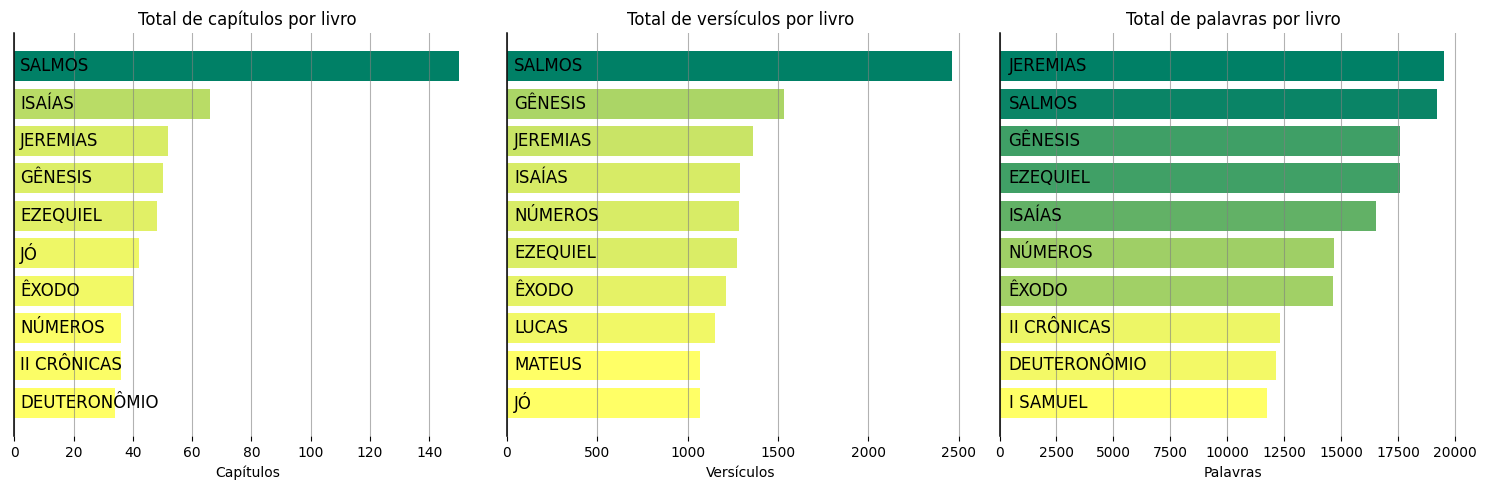

In [11]:
import matplotlib.pyplot as plt


_livros_caps = [livro[0] for livro in top_livros_caps]
_livros_vers = [livro[0] for livro in top_livros_vers]
_livros_palav = top_livros_palav.index
_caps = [livro[1] for livro in top_livros_caps]
_vers = [livro[1] for livro in top_livros_vers]
_palav = top_livros_palav['tam_verso_limpo']

fig, ax = plt.subplots(1,3, figsize=(15,5))

my_cmap = plt.get_cmap("summer_r")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

ax[0].barh(_livros_caps, _caps, color=my_cmap(rescale(_caps)))
ax[0].invert_yaxis()
for i, p in enumerate(_livros_caps):
    ax[0].text(s=p, x=2, y=i, color="black", verticalalignment="center", size=12)
ax[0].yaxis.set_visible(False)
# Set the grid
ax[0].grid(which="major",axis="x", color='grey')
# Add zorder
ax[0].grid(which="major",axis="x", color='grey', alpha=0.6, zorder=1)
ax[0].spines[["top","right","bottom"]].set_visible(False)
ax[0].spines["left"].set_linewidth(1.1)
ax[0].set_xlabel('Capítulos')
ax[0].set_title('Total de capítulos por livro')


ax[1].barh(_livros_vers, _vers, color=my_cmap(rescale(_vers)))
ax[1].invert_yaxis()
for i, p in enumerate(_livros_vers):
    ax[1].text(s=p, x=40, y=i, color="black", verticalalignment="center", size=12)
ax[1].yaxis.set_visible(False)
# Set the grid
ax[1].grid(which="major",axis="x", color='grey')
# Add zorder
ax[1].grid(which="major",axis="x", color='grey', alpha=0.6, zorder=1)
ax[1].spines[["top","right","bottom"]].set_visible(False)
ax[1].spines["left"].set_linewidth(1.1)
ax[1].set_xlabel('Versículos')
ax[1].set_title('Total de versículos por livro')


ax[2].barh(_livros_palav, _palav, color=my_cmap(rescale(_palav)))
ax[2].invert_yaxis()
for i, p in enumerate(_livros_palav):
    ax[2].text(s=p, x=400, y=i, color="black", verticalalignment="center", size=12)
ax[2].yaxis.set_visible(False)
# Set the grid
ax[2].grid(which="major",axis="x", color='grey')
# Add zorder
ax[2].grid(which="major",axis="x", color='grey', alpha=0.6, zorder=1)
ax[2].spines[["top","right","bottom"]].set_visible(False)
ax[2].spines["left"].set_linewidth(1.1)
ax[2].set_xlabel('Palavras')
ax[2].set_title('Total de palavras por livro')


plt.tight_layout()
plt.show()

In [25]:
import plotly.express as px
import seaborn as sns

pal = list(sns.color_palette(palette="summer", n_colors=25).as_hex())

top_capitulos_vers_pr = top_capitulos_vers.reset_index()
top_capitulos_vers_pr["label"] = (
    top_capitulos_vers_pr["livro"] + " " + top_capitulos_vers_pr["capitulo"]
)


fig = px.pie(
    top_capitulos_vers_pr,
    values="versiculo",
    names="label",
    color_discrete_sequence=pal,
)
fig.update_traces(
    textposition="inside",
    textinfo="label+value+percent",
    hole=0.4,
    # hoverinfo="label+percent+name",
)
fig.update_layout(
    width=600, height=600, margin=dict(t=0, l=0, r=0, b=0), showlegend=False
)

fig.show()


In [26]:
top_capitulos_palav_pr = top_capitulos_palav.reset_index()
top_capitulos_palav_pr["label"] = (
    top_capitulos_palav_pr["livro"] + " " + top_capitulos_palav_pr["capitulo"]
)
top_capitulos_palav_pr

fig = px.pie(top_capitulos_palav_pr, values="tam_verso_limpo", names="label", color_discrete_sequence=pal,)
fig.update_traces(
    textposition="inside",
    textinfo="label+value+percent",
    hole=0.4,
    #hoverinfo="label+percent+name",
)
fig.update_layout(width=600, height=600, margin=dict(t=0, l=0, r=0, b=0), showlegend=False)

fig.show()

In [14]:
top_versos_pr = top_versos.copy()
top_versos_pr['label'] = top_versos_pr['livro'] + ' ' + top_versos_pr['capitulo'] + ':' + top_versos_pr['versiculo']
top_versos_pr[['label', 'verso']].to_csv('top_versos.csv')

# Palavras

In [15]:
grande_string = ""
for linha in versiculos_limpo:
    grande_string += linha + " "

list_words = grande_string.split(" ")
set_words_full = list(set(list_words))
count_words = [list_words.count(i) for i in set_words_full]


In [16]:
contagem_palav = pd.DataFrame(zip(set_words_full, count_words), columns=['palavra','contagem'])
contagem_palav = contagem_palav.sort_values('contagem', ascending=False)
contagem_palav

,palavra,contagem
22427,SENHOR,8017
21959,DEUS,4417
14337,POIS,3382
10435,TERRA,2936
13073,FILHOS,2781
...,...,...
13358,CAVASSES,1
13362,VENDEDORA,1
13364,ARÁBIOS,1
13368,LISO,1


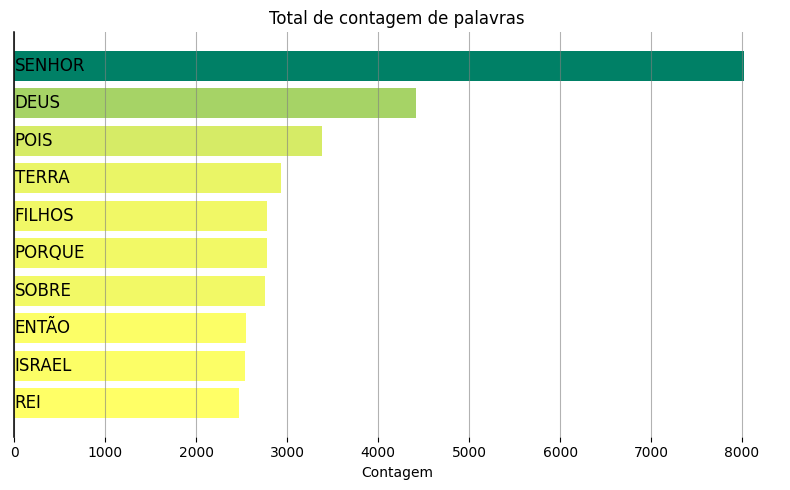

In [43]:
fig, ax = plt.subplots(figsize=(8,5))

_palavras = contagem_palav.head(10)['palavra']
_palavras_cont = contagem_palav.head(10)['contagem']

ax.barh(_palavras, _palavras_cont, color=my_cmap(rescale(_palavras_cont)))
ax.invert_yaxis()
for i, p in enumerate(_palavras):
    ax.text(s=p, x=2, y=i, color="black", verticalalignment="center", size=12)
ax.yaxis.set_visible(False)
# Set the grid
ax.grid(which="major",axis="x", color='grey')
# Add zorder
ax.grid(which="major",axis="x", color='grey', alpha=0.6, zorder=1)
ax.spines[["top","right","bottom"]].set_visible(False)
ax.spines["left"].set_linewidth(1.1)
ax.set_xlabel('Contagem')
ax.set_title('Total de contagem de palavras')

plt.tight_layout()
plt.show()

In [49]:
fig = px.treemap(
    contagem_palav[0:50],
    path=[px.Constant("Bíblia"), "palavra"],
    values="contagem",
    color="contagem",
    color_continuous_scale="tempo",
    #color_continuous_midpoint=np.average(contagem_palav["contagem"]),
)

fig.update_layout(margin=dict(t=5, l=5, r=5, b=5))
fig.show()


In [34]:
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

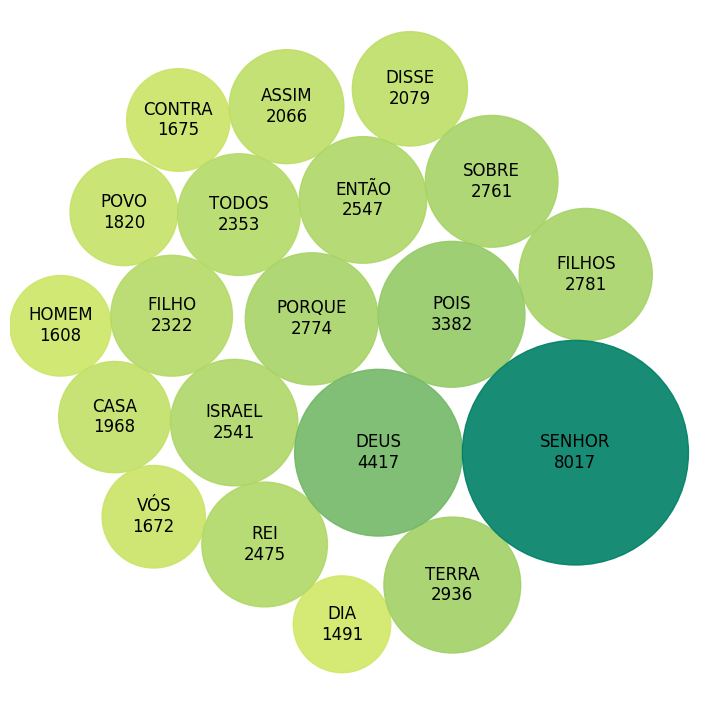

In [39]:
import circlify

# compute circle positions:
circles = circlify.circlify(
    contagem_palav["contagem"][0:20].tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0),
)

n = contagem_palav["contagem"][0:20].max()
color_dict = get_colordict("summer_r", n, 1)

fig, ax = plt.subplots(figsize=(9, 9), facecolor="white")
ax.axis("off")
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = list(contagem_palav["palavra"][0:20])
counts = list(contagem_palav["contagem"][0:20])
labels.reverse()
counts.reverse()

# print circles
for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color=color_dict.get(count)))
    plt.annotate(label + "\n" + str(count), (x, y), size=12, va="center", ha="center")
plt.xticks([])
plt.yticks([])
plt.show()


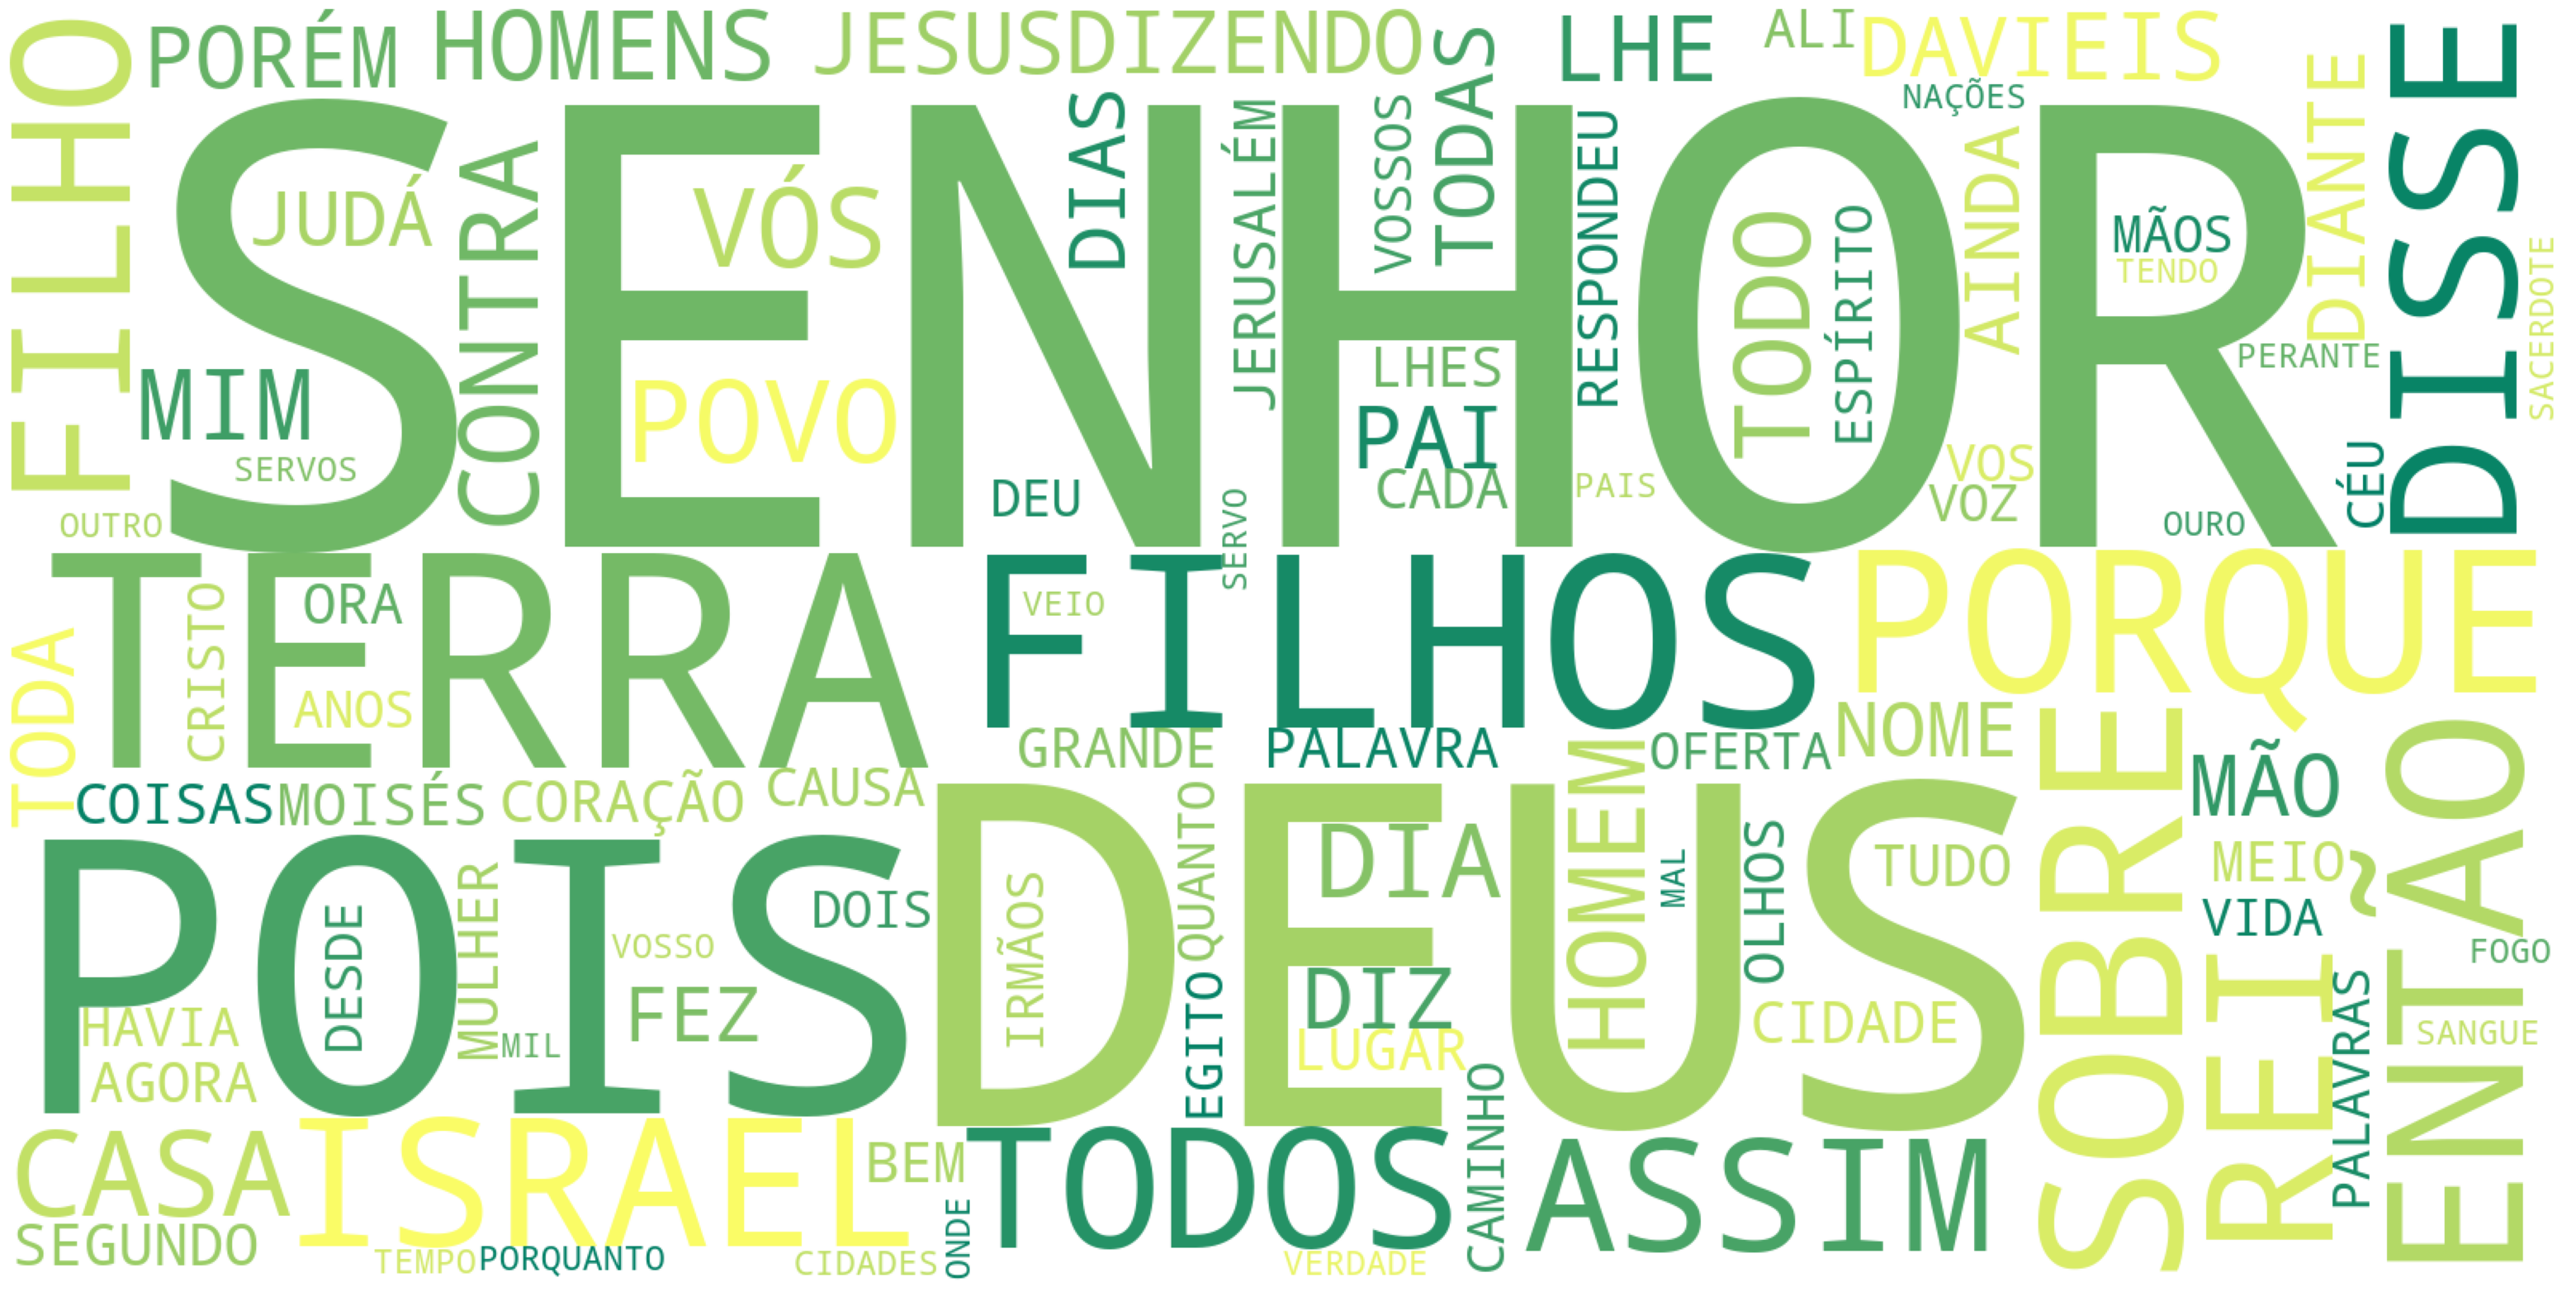

In [50]:
from wordcloud import WordCloud


wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    min_word_length=3,
    max_words=100,
    collocations=False,
    normalize_plurals=False,
    colormap='summer'
).generate(grande_string)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


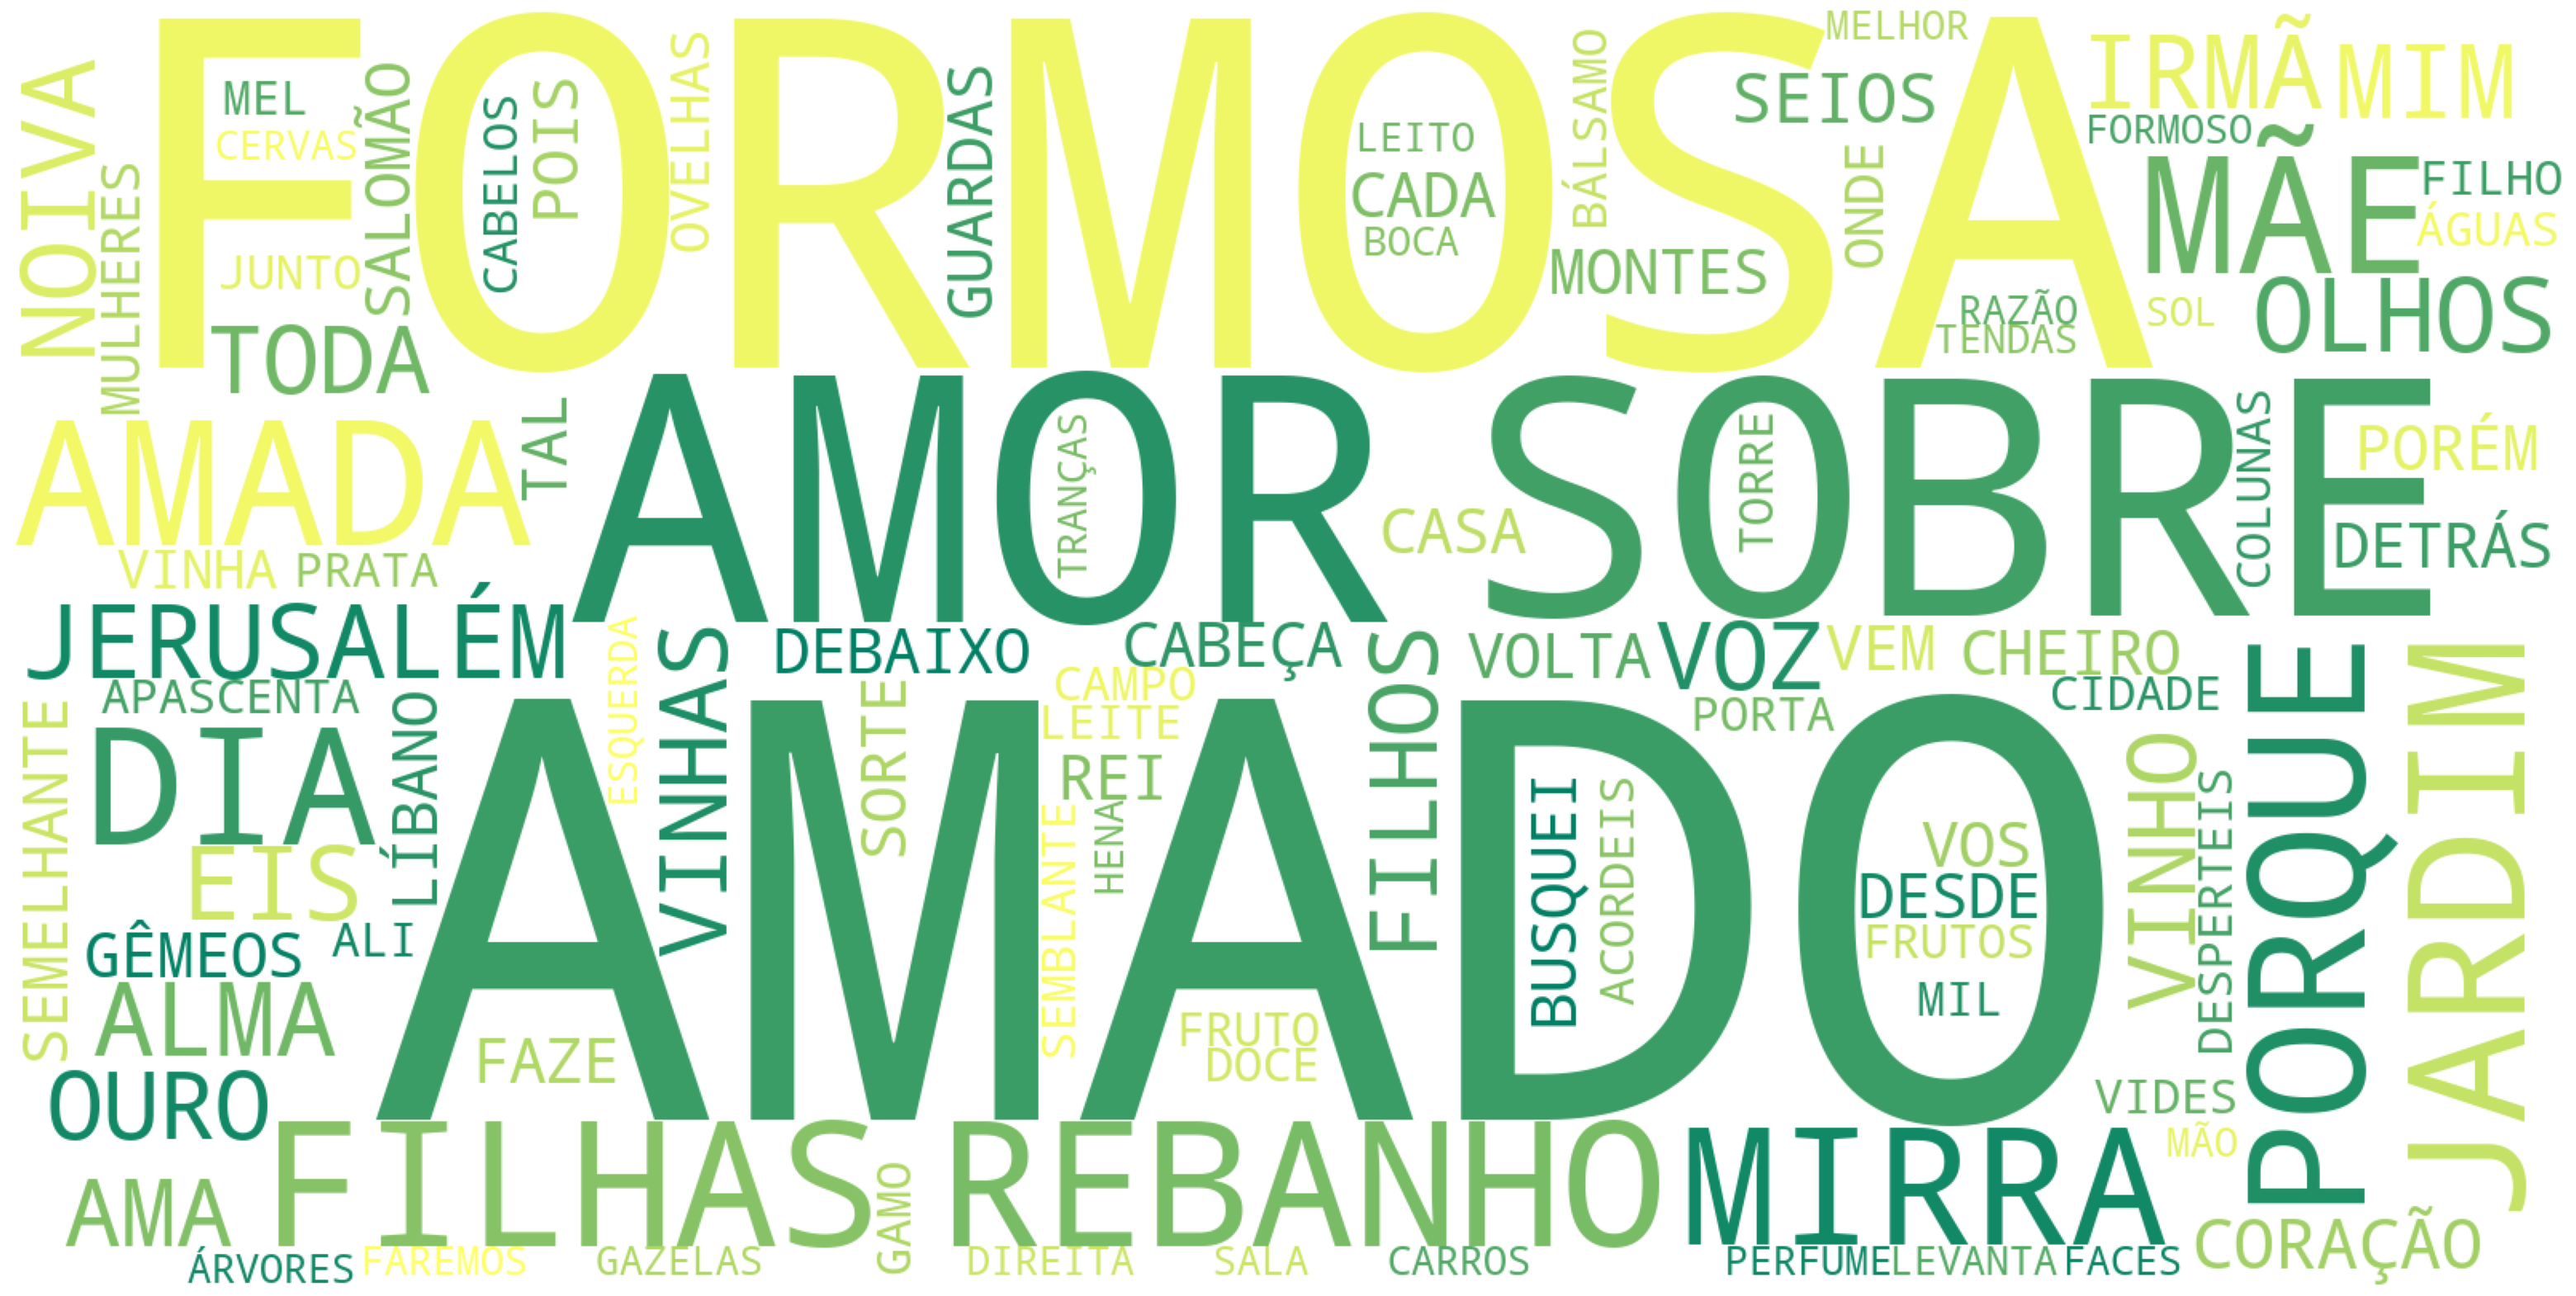

In [51]:
cantares_df = versiculos_df[versiculos_df["livro"] == "CÂNTICO DOS CÂNTICOS"]

cantares_string = ""
for verso in cantares_df.to_dict(orient="records"):
    cantares_string += verso["verso_limpo"]


wordcloud_cantares = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    min_word_length=3,
    max_words=100,
    collocations=False,
    normalize_plurals=False,
    colormap='summer'
).generate(cantares_string)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud_cantares)
plt.axis("off")
plt.show()
